In [6]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import csv
import random
from sklearn.svm import SVC
dataset=pd.read_csv('iris.csv')
data=dataset.loc[(dataset['variety']=='Virginica') | (dataset['variety']=='Versicolor')]

# data['variety'].replace('Virginica',1,inplace=True)
# data['variety'].replace('Versicolor',0,inplace=True)
# data['variety'].replace('Virginica',1,inplace=True)
# data['variety'].replace('Versicolor',0,inplace=True)


In [98]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import csv
import random
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

x = data.drop('variety', axis = 1).values
y = data['variety'].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 3)

svm = SVC(kernel='linear', C=1.0, random_state=0)
#svm = SVC(kernel='rbf', C=1, random_state=0, gamma=10)  #gaussian kernel


svm.fit(X_train, y_train)
y_pred_svc = svm.predict(X_test)
print('Accuracy: %.2f' % getAccuracy(y_test, y_pred_svc))




Accuracy: 96.00


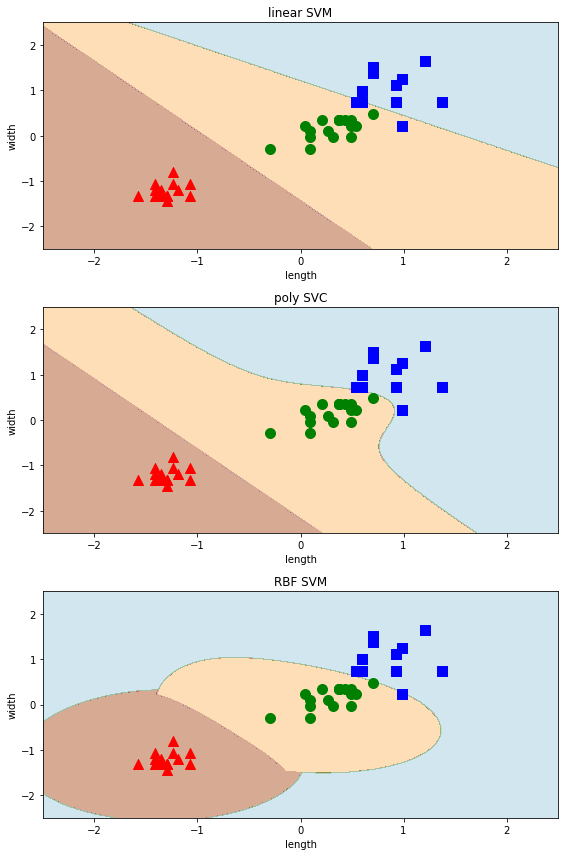

In [29]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))


def plot_iris(X, y, model, title, xmin=-2.5, xmax=2.5, ymin=-2.5, ymax=2.5):
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),
                         np.arange(ymin, ymax, (ymax-ymin)/1000))
    ZZ = np.reshape(model.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Paired_r, alpha=0.5)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='r', marker='^', label='0', s=100)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='g', marker='o', label='1', s=100)
    plt.scatter(X[y == 2, 0], X[y == 2, 1], c='b', marker='s', label='2', s=100)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.xlabel("length")
    plt.ylabel("width")
    plt.title(title)


model1 = SVC(kernel='linear', C=1.0).fit(X_test_std, y_test)
model2 = SVC(kernel='poly', random_state=0,
             gamma=10, C=1.0).fit(X_test_std, y_test)
model3 = SVC(kernel='rbf', random_state=0, gamma=1,
             C=1.0).fit(X_test_std, y_test)

plt.figure(figsize=(8, 12))
plt.subplot(311)
plot_iris(X_test_std, y_test, model1, "linear SVM")
plt.subplot(312)
plot_iris(X_test_std, y_test, model2, "poly SVC")
plt.subplot(313)
plot_iris(X_test_std, y_test, model3, "RBF SVM")
plt.tight_layout()
plt.show()

